<a href="https://colab.research.google.com/github/larax2do/AprendiendoIA/blob/main/1_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Lineal

*Apuntes de Thales @executorLarax*

Aprendizaje Supervisado

La idea es elegir parametros $w_0$ y $w_1$ tal que la funcion $h(x)$ este lo mas cerca a nuestros datos $(x,y)$ que son nuestro conjunto de entrenamiento

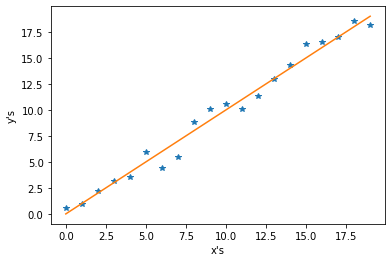




Términos


*   $m$ = Tamaño del conjunto de entrenamiento
*   $x^{(i)}$ = Caracteristica $(i)$ del conjunto de entrenamiento
*   $w_j$= parametros a optomizar de la funcion Costo.


| Caracteristica 1 ($x$) | $y$ |
| -- | -- | 
| $x^{(1)}$ | $y^{(1)}$ |
| $x^{(2)}$ | $y^{(2)}$ |
| $x^{(3)}$ | $y^{(3)}$ |

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

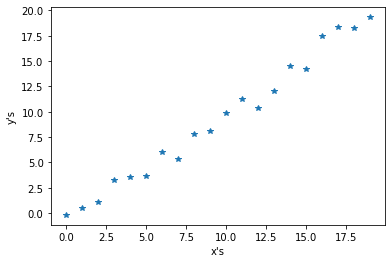

In [ ]:
x_ds = [i for i in range(20)]
y_ds = [ i + np.random.normal(0,1) for i in x_ds ]

plt.xlabel("x's")
plt.ylabel("y's")
plt.plot(x_ds, y_ds,'*')

## Cual sera la mejor recta que se ajusta a nuestros puntos?

una recta de la forma $h(x)=w_0+w_1$

Necesitamos encontrar $w_0$ y $w_1$ de nuestra recta

Esta recta se llama hipotesis o modelo

## Hipotesis
$h(x_i) = w_0 + w_1x_i$


In [ ]:

def h(x,w):
  return w[0] + w[1]*x


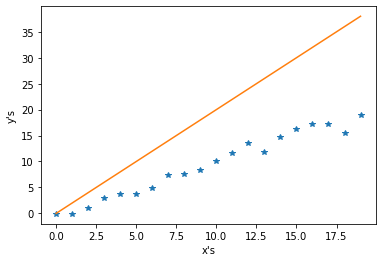

In [ ]:
x_ds = [i for i in range(20)]
y_ds = [ i + np.random.normal(0,1) for i in x_ds ]
y_xs = [ i + i for i in x_ds ]

plt.xlabel("x's")
plt.ylabel("y's")
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, y_xs)

## Funciones de Perdida
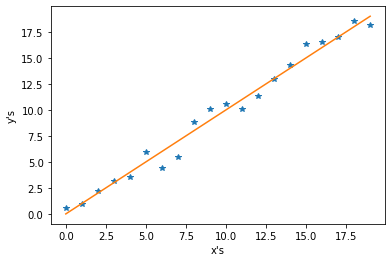


Si observamos nuestro grafico anterior de nuestros puntos, podemos ver que ninguna recta pasará exactamente por cada uno de los puntos. Entre nuestra recta(hipotesis o modelo) y su poscicion real(las estrellias) hay una diferencia. Por lo tanto sumamos estas brechas. Mientras mas pequeña sea la suma de estas brechas, nuestro error sera menor. 

En el siguiente grafico podemos observar que nuestro modelo(recta) esta terriblemente ajustada, podemos ver que esas brechas(distancia entre la recta y la estrella) es muy grande, pero podria ser mejor.

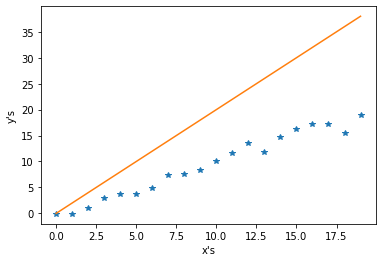

En el siguiente ejemplo, nuestro modelo es perfecto, no existen brechas. Pero estas cosas no pasan

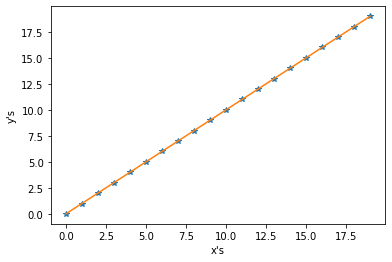








Hay varias formas de calcular este error, la mas comun se llama MSE, calculamos la diferencia y lo elevamos al cuadrado para que siempre sea positivo.

### Error cuadratico medio

> $MSE =  \frac{1}{2n}\sum_{i=0}(y_i - h(x_i))²$

### Error absoluto medio

> $MAE = \frac{1}{n} \sum_{i=0}^{n} |y_i- h(x_i)|$

### Error Huber

> $   
Huber = 
     \begin{cases}
       \text{$\frac{1}{2}(y_i-h(x_i))^2$,} &\quad\text{for $ \left | y_i-h(x_i) \right |\leq\delta  $}\\
       \text{$ \delta \left | y_i-h(x_i) \right |-\frac{1}{2}\delta^2 $,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

### Error Log Cosh

> $Log Cosh=\sum_{i=1}^{n} log(cosh(y_i-h(x_i))) $

In [ ]:
def ErrorMSE(y,x,w):
 return sum( [ (e[0] - h(e[1],w))**2 for  e in zip(y,x) ])/(2*len(y))


def ErrorMae(y,x,w):
 return sum( [ abs(e[0] - h(e[1],w)) for  e in zip(y,x) ])/(len(y))


def ErrorHuber(y,x,w,delta):
  return sum(([ (np.where(e[0] - h(e[1],w)<=delta,0.5*((e[0]-h(e[1],w))**2),delta*abs(e[0]-h(e[1],w)) - 0.5*(delta**2)))  for  e in zip(y_ds,x_ds) ]))/len(y)

def ErrorLogCosh(y,x,w):
  return sum([ np.log10(np.cosh(e[0] - h(e[1],w))) for e in zip(y,x) ])




## Derivadas MSE 

$Error =  \frac{1}{2n}\sum_{i=0}^n(y_i - h(x_i))²$



$\frac{ \partial Error}{\partial w_0}  = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))*(-1) $

$\frac{ \partial Error}{\partial w_1}  = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))*(-x) $


In [ ]:
def grad(y,x,w):
  grad_w0 = sum([ (e[0] - h(e[1],w))*(-1) for e in zip(y,x) ])/len(y)
  grad_w1 = sum([ (e[0] - h(e[1],w))*(-e[1]) for e in zip(y,x) ])/len(y)
  return grad_w0, grad_w1

## Derivadas MAE

$Error = \frac{1}{n} \sum_{i=0}^{n} |y_i- h(x_i)|$

$\frac{ \partial Error}{\partial w_0}  = \frac{1}{n}\sum_{i=0}\frac{(y_i - h(x_i))*(-1)}{|y_i - h(x_i)|} $

$\frac{ \partial Error}{\partial w_1}  = \frac{1}{n}\sum_{i=0}\frac{(y_i - h(x_i))*(-x)}{|y_i - h(x_i)|} $

In [ ]:
def gradMae(y,x,w):
  grad_w0 = sum([ (e[0] - h(e[1],w))/abs(e[0] - h(e[1],w))*(-1)    for e in zip(y,x) ])/len(y)
  grad_w1 = sum([ (e[0] - h(e[1],w))/abs(e[0] - h(e[1],w))*(-e[1]) for e in zip(y,x) ])/len(y)
  return grad_w0, grad_w1

## Derivadas Huber

> $   
Huber = 
     \begin{cases}
       \text{$\frac{1}{2}(y_i-h(x_i))^2$,} &\quad\text{for $ \left | y_i-h(x_i) \right |\leq\delta  $}\\
       \text{$ \delta \left | y_i-h(x_i) \right |-\frac{1}{2}\delta^2 $,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

Cuando $|y_i-h(x_i)| \leq \delta$
>  $\frac{\partial Huber}{\partial w_0}=\frac{1}{2}(y_i-h(x_i))*(-1)$

>  $\frac{\partial Huber}{\partial w_1}=\frac{1}{2}(y_i-h(x_i))*(-x)$

Otros casos
>  $\frac{\partial Huber}{\partial w_0}=\frac{\delta}{n}\frac{(y_i - h(x_i))*(-1)}{|y_i - h(x_i)|}$

>  $\frac{\partial Huber}{\partial w_1}=\frac{\delta}{n}\frac{(y_i - h(x_i))*(-x)}{|y_i - h(x_i)|}$

In [ ]:
delta=10

In [ ]:
def gradHuber(y,x,w,delta):
  grad_w0= sum(([ (np.where(e[0] - h(e[1],w)<=delta,((e[0]-h(e[1],w))*(-1)),((e[0]-h(e[1],w))*delta)/abs(e[0]-h(e[1],w))))  for  e in zip(y,x) ]))*1/len(y)
  grad_w1= sum(([ (np.where(e[0] - h(e[1],w)<=delta,((e[0]-h(e[1],w))*(-e[1])),((e[0]-h(e[1],w))*delta*e[1])/abs(e[0]-h(e[1],w))))  for  e in zip(y,x) ]))*1/len(y)
  return grad_w0,grad_w1

## Derivadas LOG COSH


$Log Cosh=\sum_{i=1}^{n} log(cosh(y_i-(w_0+w_1x))) $

$\frac{ \partial Error}{\partial w_0}  =  \sum_{i=1}^{n} \frac{sinh(y_i-(w_0+w_1x))}{cosh(y_i-(w_0+w_1x))}(-1)$

$\frac{ \partial Error}{\partial w_1}  =  \sum_{i=1}^{n} \frac{sinh(y_i-(w_0+w_1x))}{cosh(y_i-(w_0+w_1x))}(-x)$



In [ ]:
def gradLogCosh(y,x,w):
  grad_w0 = sum([ ((np.sinh(e[0]-h(e[1],w)))*(-1)/((np.cosh(e[0]-h(e[1],w)))*np.log(10))) for e in zip(y,x) ])
  grad_w1 = sum([ ((np.sinh(e[0]-h(e[1],w)))*(-e[1])/((np.cosh(e[0]-h(e[1],w)))*np.log(10))) for e in zip(y,x) ])
  return grad_w0, grad_w1

In [ ]:

x_ds = [i for i in range(30)]
y_ds = [ i + np.random.normal(0,3)+20 for i in x_ds ]


## Entrenamiento

In [ ]:


def train(x_ds, y_ds, w, epochs, alpha):
  #w = np.random.rand(2)
  list_error = []
  time = []
  
  for i in range(epochs):
    print(w)
    Err = ErrorHuber(y_ds,x_ds,w,delta)
    list_error.append(Err)
    time.append(i)
    grad_w0, grad_w1 = gradHuber(y_ds,x_ds,w,delta)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1


## Pruebas

[0.91893629 0.82110409]
Error  :9.24563724559256
[0.91893629 0.82110409]
[0.92244373 0.93991007]
[0.92303692 0.96257548]
[0.92307422 0.96690137]
[0.92300549 0.96772887]
[0.92291655 0.96788902]
[0.92282379 0.96792186]
[0.92273031 0.96793043]
[0.92263671 0.96793436]
[0.92254311 0.9679374 ]
[0.92244953 0.96794028]
[0.92235597 0.96794312]
[0.92226244 0.96794596]
[0.92216893 0.96794879]
[0.92207544 0.96795163]
[0.92198198 0.96795446]
[0.92188855 0.96795729]
[0.92179513 0.96796012]
[0.92170174 0.96796296]
[0.92160838 0.96796579]
[0.92151504 0.96796862]
[0.92142172 0.96797144]
[0.92132843 0.96797427]
[0.92123516 0.9679771 ]
[0.92114192 0.96797993]
[0.92104869 0.96798275]
[0.9209555  0.96798558]
[0.92086232 0.9679884 ]
[0.92076918 0.96799122]
[0.92067605 0.96799405]
[0.92058295 0.96799687]
[0.92048987 0.96799969]
[0.92039682 0.96800251]
[0.92030379 0.96800533]
[0.92021079 0.96800815]
[0.9201178  0.96801097]
[0.92002485 0.96801379]
[0.91993191 0.9680166 ]
[0.919839   0.96801942]
[0.91974612 0.9

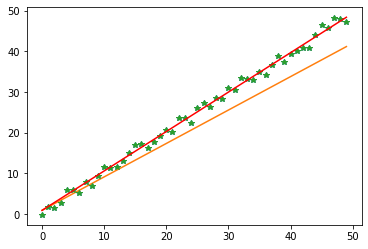

In [ ]:
x_ds = [i for i in range(50)]
y_ds = [ i + np.random.normal(0,1) for i in x_ds ]



w = np.random.rand(2)
print(w)
y_pd  = [ h(i,w) for i in x_ds ]
plt.plot(x_ds,y_ds, '*')
plt.plot(x_ds,y_pd)

print("Error  :" + str(ErrorHuber(y_ds, x_ds,w,delta)))

train(x_ds,y_ds, w, 200,0.001)

plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds],color='red')

print("Error  :" + str(ErrorHuber(y_ds, x_ds,w,delta)))

